# **Deep Learning Project: Street View Housing Number Digit Recognition**


--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten 
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import h5py

**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
data = h5py.File('/content/drive/MyDrive/Elective Project/SVHN_single_grey1.h5', 'r')

X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

data.close()

Check the number of images in the training and the testing dataset.

In [5]:
len(X_train)

42000

In [6]:
len(X_test)

18000

**Observation:**

There are 42,000 images in the train set and 18,000 in the test set.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

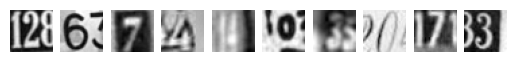

First 10 labels:  [2 6 7 4 4 0 3 0 7 3]


In [7]:
# Show the first 10 images
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the first 10 labels
print('First 10 labels: ', y_train[:10])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [8]:
# Print the shape of the first image
print("Shape of the first image:\n", X_train[0].shape)

# Print the pixel array of the first image
print("Pixel array of the first image:\n", X_train[0])

Shape of the first image:
 (32, 32)
Pixel array of the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Print the shapes of Training and Test data

In [10]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


### **One-hot encode output**

In [11]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**


Each label has been converted into a 1D array(vector) representing its value, e.g the label 3 is now represented as [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] (since there are 10 labels total inclusive of 0)

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [12]:
import random

np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [16]:
#To match the input shape, we have to flatten X_train and X_test from 2D to 1D arrays
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

#Model Function
def nn_model_1():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1024,)),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

#Declaring the model
model = nn_model_1()


In [17]:
# Printing the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Fitting
history = model.fit(X_train_flattened, y_train_encoded, 
                    validation_split=0.2, 
                    batch_size=128, 
                    verbose=1, 
                    epochs=20)

Epoch 1/20
263/263 [==============================] - 2s 6ms/step - loss: 2.3028 - accuracy: 0.1111 - val_loss: 2.2848 - val_accuracy: 0.1258
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1199 - accuracy: 0.2377 - val_loss: 1.8635 - val_accuracy: 0.3435
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 1.7111 - accuracy: 0.4177 - val_loss: 1.6003 - val_accuracy: 0.4705
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 1.5355 - accuracy: 0.4946 - val_loss: 1.4979 - val_accuracy: 0.5114
Epoch 5/20
263/263 [==============================] - 2s 6ms/step - loss: 1.4433 - accuracy: 0.5287 - val_loss: 1.4476 - val_accuracy: 0.5205
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3846 - accuracy: 0.5469 - val_loss: 1.3547 - val_accuracy: 0.5638
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3460 - accuracy: 0.5601 - val_loss: 1.3183 - val_accuracy: 0.5754
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

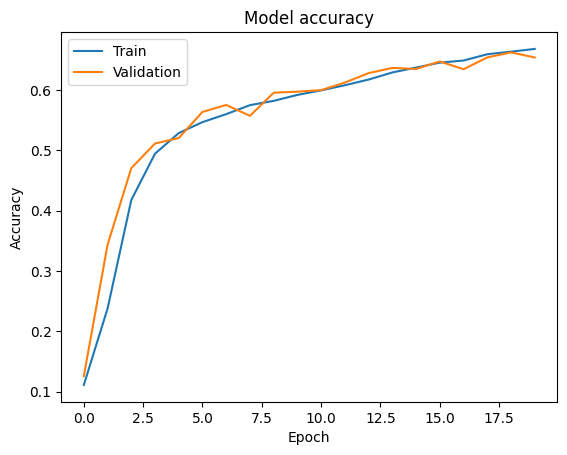

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations:**

1.   Convergenece occurs around 4 epochs after which improvements are incremental, not rapid.
2.   No signs of overfitting as the training and validation accuracies remain close throughout.
1.   There is likely some underfitting as the accuracies peak at 65% and improvement is slow.









Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [36]:
from tensorflow.keras import backend

backend.clear_session()

np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [37]:
#Model 2 Function
def nn_model_2():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(1024, )),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
    return model

#Declaring the model
model_2 = nn_model_2()

In [38]:
# Printing the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [39]:
#Fitting model 2

history_2 = model_2.fit(
    X_train_flattened, y_train_encoded, 
    validation_split=0.2,
    batch_size=128, 
    verbose=1, 
    epochs=30
)

Epoch 1/30
263/263 [==============================] - 6s 17ms/step - loss: 2.3711 - accuracy: 0.1019 - val_loss: 2.3067 - val_accuracy: 0.1023
Epoch 2/30
263/263 [==============================] - 3s 11ms/step - loss: 2.2880 - accuracy: 0.1215 - val_loss: 2.2071 - val_accuracy: 0.1845
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 1.8951 - accuracy: 0.3113 - val_loss: 1.6393 - val_accuracy: 0.4525
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.5319 - accuracy: 0.4766 - val_loss: 1.4065 - val_accuracy: 0.5362
Epoch 5/30
263/263 [==============================] - 4s 15ms/step - loss: 1.3193 - accuracy: 0.5674 - val_loss: 1.2047 - val_accuracy: 0.6145
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.2160 - accuracy: 0.6074 - val_loss: 1.1701 - val_accuracy: 0.6226
Epoch 7/30
263/263 [==============================] - 3s 11ms/step - loss: 1.1453 - accuracy: 0.6313 - val_loss: 1.0461 - val_accuracy: 0.6670

### **Plot the Training and Validation Accuracies and write down your Observations.**

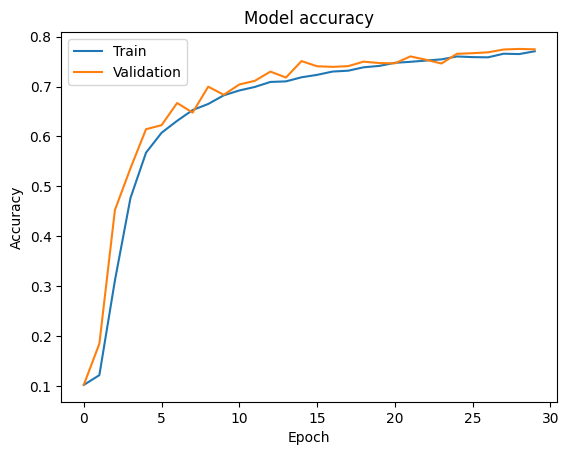

In [40]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations:**
1.   Convergenece occurs around 4 epochs after which improvements are incremental, not rapid.
2.   No signs of overfitting as the training and validation accuracies remain close throughout.
1.   Despite accuracy improvements over the previous model, there is likely still some underfitting as the accuracies peak at 75% and improvement is slow.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [41]:
y_test_pred = model_2.predict(X_test_flattened)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [42]:
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [50]:

# print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred_classes))


# print the confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_test_pred_classes))

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1814
           1       0.73      0.84      0.78      1828
           2       0.81      0.76      0.79      1803
           3       0.70      0.76      0.73      1719
           4       0.79      0.85      0.82      1812
           5       0.78      0.73      0.75      1768
           6       0.83      0.76      0.79      1832
           7       0.70      0.88      0.78      1808
           8       0.86      0.66      0.74      1812
           9       0.76      0.76      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000

Confusion Matrix:

[[1386   70   21   61   63    9   40   72   16   76]
 [  21 1540   22   43   64   10   12   87    8   21]
 [  10   49 1369   46   34   17    4  223   16   35]
 [  16   74   48 1314   32   88   11   

**Final Observations:**

***1. Classification report***

Class 0 and 8 have the highest precision of 0.85 and 0.86.

The model has the least precision with class 3 and 7, 0.7 each.

In terms of recall, the model performs best on class 7, identifying 88% of all class 7 instances correctly.

The model has the worst recall for class 8, where it only identifies 66% of all class 8 instances.

The model performs best on class 0 and 4 in terms of F1-score.

The overall accuracy of the model is 0.78, which indicates that 78% of all classifications are correct. The macro average and the weighted average are also 0.78.

***2. Confusion Matrix***

The model performs best on class 1, where 1540 out of 1828 are correct identifications. 

It performs worst on class 8, where only 1194 out of 1812 instances are correctly identified.

The model is most frequently confusing between some specific pairs of classes (like 2 and 7, 3 and 5, 8 and 9).

For class 2, the model confuses it to be class 7 quite often (223 instances).

For class 5, the model seems to misclassify it as class 3 (177 instances).

Class 8 is often misclassified as class 9 (122 instances).

The above are the 3 most frequent misclassification instances.





## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [51]:
data = h5py.File('/content/drive/MyDrive/Elective Project/SVHN_single_grey1.h5', 'r')

X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

data.close()

Check the number of images in the training and the testing dataset.

In [52]:
print("Number of images in the training dataset: ", X_train.shape[0])

print("Number of images in the testing dataset: ", X_test.shape[0])

Number of images in the training dataset:  42000
Number of images in the testing dataset:  18000


**Observation:**

There are 42,000 images in the train set and 18,000 in the test set.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [54]:
# Print the shape and the array of pixels 
print("Shape of the first image in the training dataset:\n", X_train[0].shape)
print("Array of pixels for the first image in the training dataset:\n", X_train[0])


Shape of the first image in the training dataset:
 (32, 32)
Array of pixels for the first image in the training dataset:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [56]:
X_train = X_train.reshape(-X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [57]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [60]:
print("New shape of the training dataset: ", X_train.shape)
print("New shape of the testing dataset: ", X_test.shape)

New shape of the training dataset:  (42000, 32, 32, 1)
New shape of the testing dataset:  (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [61]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**

The new shapes of the X_train and X_test are 4D arrays now.

For y_test and y_train, each label has been converted into a 1D array(vector) representing its value, e.g the label 3 is now represented as [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] (since there are 10 labels total inclusive of 0)

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [69]:
backend.clear_session()
np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [70]:
#CNN Model 1 Function
def cnn_model_1():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

#Declaring the model
cnn_model = cnn_model_1()
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [71]:
#Fitting
history = cnn_model.fit(X_train, y_train_encoded, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 87s 82ms/step - loss: 1.0949 - accuracy: 0.6476 - val_loss: 0.6117 - val_accuracy: 0.8292
Epoch 2/20
1050/1050 [==============================] - 81s 78ms/step - loss: 0.5389 - accuracy: 0.8452 - val_loss: 0.5400 - val_accuracy: 0.8432
Epoch 3/20
1050/1050 [==============================] - 78s 75ms/step - loss: 0.4415 - accuracy: 0.8723 - val_loss: 0.4568 - val_accuracy: 0.8694
Epoch 4/20
1050/1050 [==============================] - 87s 83ms/step - loss: 0.3820 - accuracy: 0.8876 - val_loss: 0.4811 - val_accuracy: 0.8656
Epoch 5/20
1050/1050 [==============================] - 77s 74ms/step - loss: 0.3340 - accuracy: 0.9020 - val_loss: 0.4445 - val_accuracy: 0.8781
Epoch 6/20
1050/1050 [==============================] - 84s 80ms/step - loss: 0.3009 - accuracy: 0.9110 - val_loss: 0.4613 - val_accuracy: 0.8775
Epoch 7/20
1050/1050 [==============================] - 86s 82ms/step - loss: 0.2689 - accuracy: 0.9193 - val_loss: 0.4508 -

### **Plot the Training and Validation Accuracies and Write your observations.**

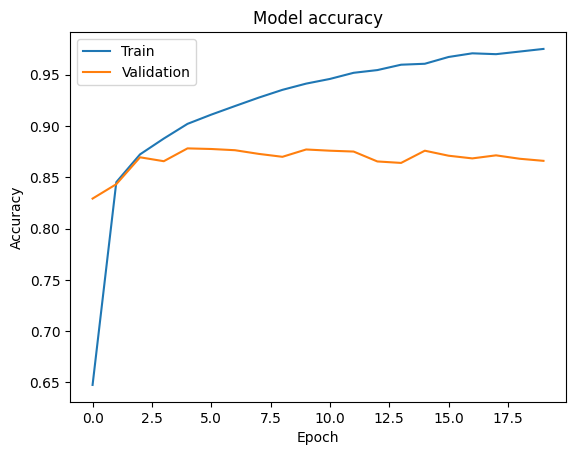

In [72]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations:**

The training accuracy continues to increase while the validation accuracy decreases/stagnates after 2 epochs which strongly indicates overfitting. The model has learnt the training data too well negatively impacting its ability to generalize to new data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [78]:
backend.clear_session()
np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [79]:
def cnn_model_2():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

cnn_model2 = cnn_model_2()
print(cnn_model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [80]:
history_2 = cnn_model2.fit(X_train, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 [==============================] - 144s 541ms/step - loss: 1.3585 - accuracy: 0.5414 - val_loss: 1.9525 - val_accuracy: 0.2493
Epoch 2/30
263/263 [==============================] - 138s 525ms/step - loss: 0.6841 - accuracy: 0.7921 - val_loss: 0.6527 - val_accuracy: 0.8202
Epoch 3/30
263/263 [==============================] - 136s 516ms/step - loss: 0.5580 - accuracy: 0.8316 - val_loss: 0.4403 - val_accuracy: 0.8748
Epoch 4/30
263/263 [==============================] - 136s 519ms/step - loss: 0.4938 - accuracy: 0.8478 - val_loss: 0.4269 - val_accuracy: 0.8812
Epoch 5/30
263/263 [==============================] - 140s 533ms/step - loss: 0.4391 - accuracy: 0.8677 - val_loss: 0.3779 - val_accuracy: 0.8954
Epoch 6/30
263/263 [==============================] - 134s 510ms/step - loss: 0.4087 - accuracy: 0.8749 - val_loss: 0.3997 - val_accuracy: 0.8886
Epoch 7/30
263/263 [==============================] - 138s 527ms/step - loss: 0.3849 - accuracy: 0.8830 - val_loss: 0.3721 -

### **Plot the Training and Validation accuracies and write your observations.**

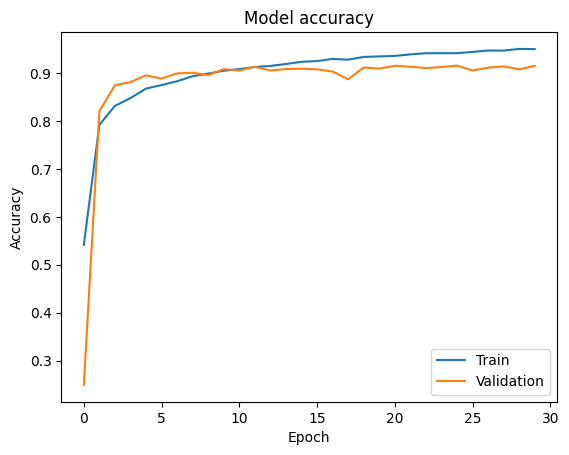

In [88]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

**Observations:**

1.   Convergenece occurs around 4 epochs after which improvements are incremental, not rapid.
2.   There are slight signs of overfitting towrads later epochs as the training and validation accuracies get separated but not by much.
1.   Overall accuracy has improved compared to the previous model.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [83]:
y_test_pred = cnn_model2.predict(X_test)

563/563 [==============================] - 19s 32ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [85]:
# Convert the predictions back to labels
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

In [86]:
# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred_classes))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1814
           1       0.90      0.91      0.90      1828
           2       0.92      0.93      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.93      0.93      0.93      1812
           5       0.89      0.93      0.91      1768
           6       0.91      0.90      0.91      1832
           7       0.95      0.92      0.93      1808
           8       0.90      0.90      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.92      0.91      0.91     18000

Confusion Matrix:
 [[1697   30   18    4    5    2   25    6   12   15]
 [  19 1665   17   19   44   11    8   20   14   11]
 [   5   12 1677   21   16    4    1   29   12   26]
 [   3   15   20 1524   12   64   24   

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

The second CNN model significantly has a significant improvement in accuracy compared to the previous models.

***1. Classification Report:***

All classes have a high precision score (around 0.9 to 0.95).

All classes have a high recall score (around 0.9 to 0.94) which suggests that the model is good at identifying positive cases.

F1 scores for all classes are high (around 0.89 to 0.93), which means the model maintains a good balance between precision and recall.

The model has an overall accuracy of 0.91.

***2. Confusion Matrix:***

The highest frequencies of misclassifcations are as below:

For class 3, the model confuses it with class 5 (64 times) and class 6 (24 times).

Class 6 is misclassified as class 5 (59 times) and class 8 (50 times).

Despite these misclassifications, the frequency of misclassfications is far less than those in the previous models. The model's overall performance is good as the values in the main diagonal (representing correct predictions) are significantly higher than those in other cells. 
